In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import random
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

print(f"Pandas version:{pd.__version__}")
print(f"Numpy version:{np.__version__}")
print(f"Seaborn version:{sns.__version__}")
# It's so important which we use version when analiyzing.


Pandas version:1.4.0
Numpy version:1.22.1
Seaborn version:0.12.1


In [9]:
dataG = pd.read_csv("/Users/barborostasdemir/Desktop/Most Watched Stocks of Past Decade(2013-2023)/Data/GOOG(Google).csv")

In [10]:
dataG.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297


In [12]:
dataG.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2513,2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2514,2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2515,2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600
2516,2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700
2517,2022-12-30,87.364998,88.830002,87.029999,88.730003,88.730003,19179300


In [13]:
dataG.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2518.0,5.930105e+01,3.517094e+01,17.550716,3.008336e+01,5.138150e+01,7.357050e+01,1.518635e+02
High,2518.0,5.990521e+01,3.558876e+01,17.567652,3.021755e+01,5.206850e+01,7.446825e+01,1.521000e+02
Low,2518.0,5.870845e+01,3.476343e+01,17.323069,2.978038e+01,5.084375e+01,7.298288e+01,1.498875e+02
Close,2518.0,5.931567e+01,3.516936e+01,17.506132,2.998436e+01,5.141950e+01,7.378925e+01,1.507090e+02
Adj Close,2518.0,5.931567e+01,3.516936e+01,17.506132,2.998436e+01,5.141950e+01,7.378925e+01,1.507090e+02
Volume,2518.0,3.960689e+07,2.685868e+07,158434.000000,2.432500e+07,3.117500e+07,4.470352e+07,4.643901e+08


In [15]:
dataG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2518 non-null   object 
 1   Open       2518 non-null   float64
 2   High       2518 non-null   float64
 3   Low        2518 non-null   float64
 4   Close      2518 non-null   float64
 5   Adj Close  2518 non-null   float64
 6   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [28]:
dataG.columns = dataG.columns.str.replace(' ', '_')

In [29]:
dataG["Open"].value_counts()

49.000000    4
39.000000    3
67.500000    3
35.950001    2
55.000000    2
            ..
35.118000    1
35.081001    1
35.326500    1
35.342999    1
87.364998    1
Name: Open, Length: 2459, dtype: int64

In [30]:
dataG["Close"].value_counts()

18.013729    2
67.178001    2
52.030499    2
54.752998    2
50.918999    2
            ..
35.645000    1
36.159000    1
35.764500    1
35.665501    1
88.730003    1
Name: Close, Length: 2493, dtype: int64

In [31]:
dataG.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
Gain/Loss    0
dtype: int64

* There is no "Nan" here

In [32]:
dataG.iloc[:15,:5]
# If all we need are the values for "date,open,high,low,close," we must use this code.

,Date,Open,High,Low,Close
0,2013-01-02,17.918339,18.107130,17.846855,18.013729
1,2013-01-03,18.055573,18.229919,17.950716,18.024191
2,2013-01-04,18.165413,18.467529,18.124067,18.380356
3,2013-01-07,18.317591,18.415474,18.196297,18.300158
4,2013-01-08,18.319834,18.338762,18.043119,18.264042
5,2013-01-09,18.238388,18.389820,18.146980,18.384092
6,2013-01-10,18.501402,18.555450,18.269024,18.467777
7,2013-01-11,18.480730,18.491440,18.338762,18.430668
8,2013-01-14,18.356195,18.485710,17.991314,18.013729
9,2013-01-15,17.916096,18.306383,17.736021,18.055573


In [33]:
dataG.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj_Close           float64
Volume                int64
Gain/Loss           float64
dtype: object

In [34]:
dataG['Date'] = pd.to_datetime(dataG['Date'])

In [35]:
dataG.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj_Close           float64
Volume                int64
Gain/Loss           float64
dtype: object

* lets look date type

A profit and loss statement is a type of financial report that details how much money your company has made and spent over a certain period of time.

In [36]:
dataG['Gain/Loss'] = dataG['Open'] - dataG['Close']

In [37]:
dataG.head(4)

,Date,Open,High,Low,Close,Adj_Close,Volume,Gain/Loss
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017,-0.095390
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567,0.031382
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331,-0.214943
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239,0.017433


* By subtracting the closing from the opening, we find out which day the apple company entered a loss - by taking a value

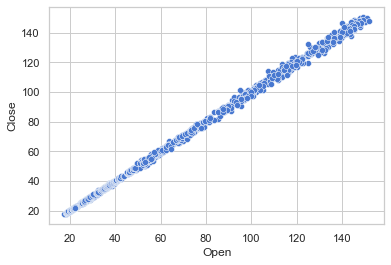

In [38]:
sns.set_theme(style='whitegrid', palette = 'muted')
sns.scatterplot(data=dataG, x = 'Open', y ='Close'); 

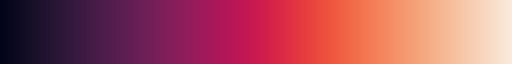

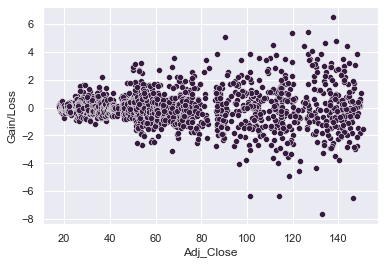

In [52]:
sns.set_theme(style='darkgrid', palette = 'rocket')
sns.scatterplot(data=dataG, x = 'Adj_Close', y ='Gain/Loss'); 
sns.color_palette("rocket", as_cmap=True)

## The percentage of actual closing value to average closing value

Text(0, 0.5, 'The percentage of actual closing value to average closing value')

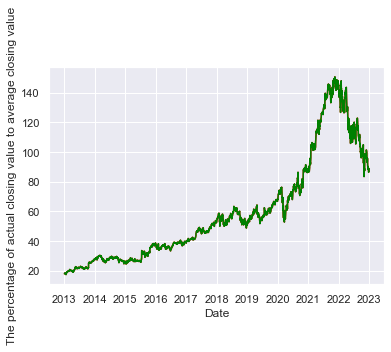

In [66]:
plt.Figure(figsize=(15,8))
plt.plot(dataG.Date, dataG.Adj_Close,color='red');
plt.plot(dataG.Date, dataG.Close, color = 'green');

plt.xlabel('Date')
plt.ylabel('The percentage of actual closing value to average closing value')

- Almost same

- In other words, the closing values of the average stock market are the same as the closing

## How many sales were necessary to cover the loss?

Text(0, 0.5, 'loss status with average capture')

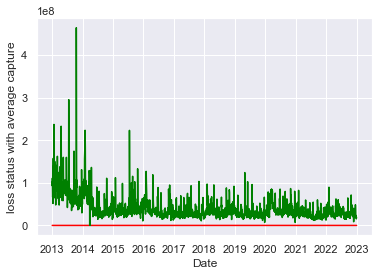

In [61]:
plt.Figure(figsize=(12,6))
plt.plot(dataG.Date, dataG["Gain/Loss"],color='red');
plt.plot(dataG.Date, dataG.Volume, color = 'green');

plt.xlabel('Date')
plt.ylabel('loss status with average capture')

## Let's find out how many şs the 5-day  average

In [70]:
dataG['AdjM5'] = dataG['Adj_Close'].rolling(5, min_periods=1).mean()

In [71]:
dataG.head(3)

,Date,Open,High,Low,Close,Adj_Close,Volume,Gain/Loss,AdjM5
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017,-0.095390,18.013729
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567,0.031382,18.018960
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331,-0.214943,18.139425


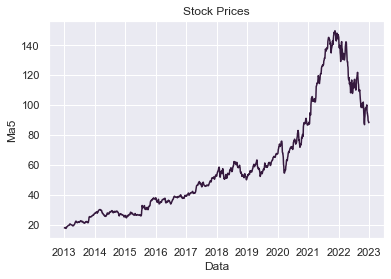

In [73]:
# we select what we require
plt.plot(dataG['Date'],dataG['AdjM5'])
plt.title('Stock Prices')
#we adjust the values of x and y
plt.xlabel('Data')
plt.ylabel('Ma5'),;

### We check the data with train test

In [76]:
X_train,X_test,y_train, y_test = train_test_split(dataG[['Adj_Close']],dataG[['AdjM5']], test_size=0.25)
# The size of the split can be specified via the “test_size” argument that takes a number of rows (integer) or a percentage (float) of the size of the dataset between 0 and 1.


In [78]:
reg = LinearRegression()

In [80]:
reg.fit(X_train,y_train)

LinearRegression()

In [81]:
preds = reg.predict(X_test)

In [82]:
print("Model Coefficiets:", reg.coef_)
print("Mean Abloute Error:", mean_absolute_error(y_test, preds))
print("Coefficient of Determination:", r2_score(y_test,preds))

Model Coefficiets: [[0.99958085]]
Mean Abloute Error: 0.8343017899209231
Coefficient of Determination: 0.9986012104375229
